In [2]:
import pandas as pd

#Import CSV file that was further cleaned in R studio (outliers removed, etc.) 
file_path = 'waterdata_clean.csv'
# Read the CSV file into a DataFrame
df = pd.read_csv(file_path, index_col=None)

#Remove row label column that was imported 
columns_to_remove = ['Unnamed: 0']
df = df.drop(columns=columns_to_remove)

In [3]:
import seaborn as sns 
import pandas as pd
import numpy as np

from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score
import seaborn as sns 

In [5]:
# Create a new column to make E. coli concentration numeric

# Define conditions... 
# colonies/100mL or MPN/100mL: <10 is 'low', >10 & <=100 is 'medium', and >100 is 'high'
conditions = [
    (df['E_COLI'] <= 10),
    (df['E_COLI'] > 10) & (df['E_COLI'] <= 100),
    (df['E_COLI'] > 100)
]
# Define corresponding labels
labels = ['low', 'medium', 'high']
# Create the new column 'E_COLI_Category'
df['E_COLI_Category'] = np.select(conditions, labels, default=np.nan)

In [18]:
# Create a new column to classify flowing vs still water

# Define conditions... 
conditions = [
    (df['SITE_TYPE'].isin(['Stream', 'Spring', 'Rural Runoff', 'Urban Runoff', 'Cave Stream', 'Storm Drain']))
]

# Define corresponding value
values = [1]

# Create the new column 'Flowing' based on the conditions and values
df['Flowing'] = np.select(conditions, values, default=0)

df

,SAMPLE_REF_NO,SAMPLE_SITE_NO,SITE_NAME,SITE_TYPE,UNIT_ECOLI,WATERSHED,UNIT_NUTRIENT,E_COLI,AMMONIA,NITRATE_NITRITE,ORTHOPHOS,SULFUR,log_ecoli,log_ammonia,log_nit,log_orthophos,E_COLI_Category,Flowing
0,229355,160,Backdoor Spring,Spring,Colonies/100mL,Barton Creek,MG/L,5.0,0.0200,1.940,0.0400,NaN,1.609438,-3.912023,0.662688,-3.218876,low,1
1,229354,35,Barton Spring,Spring,Colonies/100mL,Barton Creek,MG/L,10.0,0.0200,1.500,0.0400,NaN,2.302585,-3.912023,0.405465,-3.218876,low,1
2,229372,183,Upper Barton Spring,Spring,Colonies/100mL,Barton Creek,MG/L,88.0,0.0200,2.430,0.0400,NaN,4.477337,-3.912023,0.887891,-3.218876,medium,1
3,229413,183,Upper Barton Spring,Spring,Colonies/100mL,Barton Creek,MG/L,420.0,0.0200,2.360,0.0400,NaN,6.040255,-3.912023,0.858662,-3.218876,high,1
4,229414,422,Old Mill (Sunken Gardens) Spring,Spring,Colonies/100mL,Barton Creek,MG/L,20.0,0.0200,1.630,0.0400,NaN,2.995732,-3.912023,0.488580,-3.218876,medium,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1111,578715,4346,Lake Long mid-lake of Western Arm (LWL5),Lake,MPN/100ML,Walter E. Long Lake,MG/L,12.6,0.0392,0.313,0.0494,NaN,2.533697,-3.239079,-1.161552,-3.007805,medium,0
1112,591406,4346,Lake Long mid-lake of Western Arm (LWL5),Lake,MPN/100ML,Walter E. Long Lake,MG/L,17.3,0.0448,0.512,0.0520,NaN,2.850707,-3.105547,-0.669431,-2.956512,medium,0
1113,592939,4345,Lake Long mid-lake of Eastern Arm (LWL4),Lake,MPN/100ML,Walter E. Long Lake,MG/L,1.0,0.0200,0.020,0.0100,NaN,0.000000,-3.912023,-3.912023,-4.605170,low,0
1114,592941,4344,Lake Long @ Dam (LWL3),Lake,MPN/100ML,Walter E. Long Lake,MG/L,2.0,0.0200,0.020,0.0100,NaN,0.693147,-3.912023,-3.912023,-4.605170,low,0


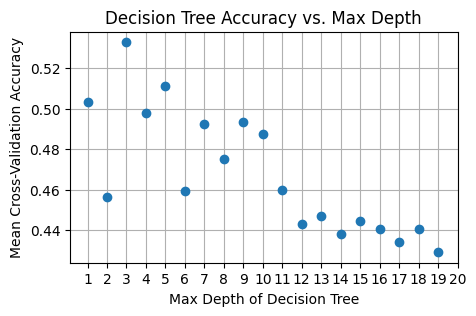

In [22]:
# Adjust max_depth hyperparameter for Decision Tree algorithm to maximize Decision Tree classifier's accuracy
from sklearn.model_selection import cross_val_score

# Define range of max_depth values
max_depth_values = range(1, 20)
# Make empty lists to store cross-validation scores mean and standard deviation
mean_cv_scores = []

# Define variables
X = df[['AMMONIA', 'NITRATE_NITRITE', 'ORTHOPHOS', 'Flowing']]
y = df['E_COLI_Category']

# Cross-validation for max_depth values
for depth in max_depth_values:
    decision_tree = DecisionTreeClassifier(max_depth=depth)
    cv_scores = cross_val_score(decision_tree, X, y, cv=50)
    mean_cv_scores.append(np.mean(cv_scores))

# Plot the results 
plt.figure(figsize=(5, 3))
plt.plot(max_depth_values, mean_cv_scores, 'o')
plt.xlabel('Max Depth of Decision Tree')
plt.ylabel('Mean Cross-Validation Accuracy')
plt.title('Decision Tree Accuracy vs. Max Depth')
plt.xticks(np.arange(1, 21, step=1))
plt.grid(True)
plt.show()

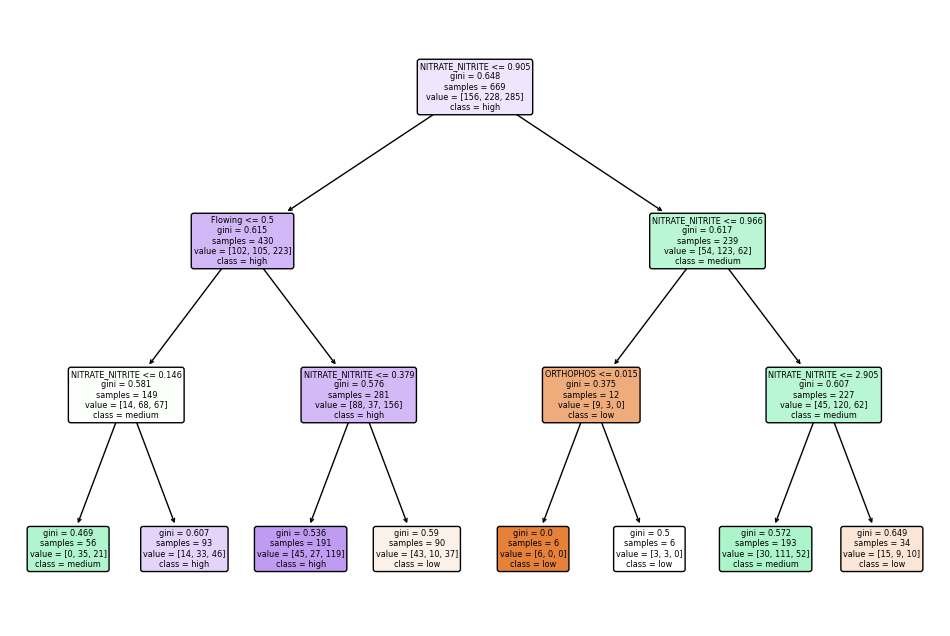

In [39]:
# DECISION TREE CLASSIFIER USING NUTRIENTS & FLOW
import matplotlib.pyplot as plt
from sklearn.tree import plot_tree

# Define variables
X = df[['AMMONIA', 'NITRATE_NITRITE', 'ORTHOPHOS', 'Flowing']]
y = df['E_COLI_Category']

class_names = y.unique()

# split into test and train
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.4, random_state=35)

# train 
decision_tree = DecisionTreeClassifier(max_depth=3)
decision_tree.fit(X_train, y_train)

# visualize
plt.figure(figsize=(12, 8))
_ = plot_tree(decision_tree, feature_names=X.columns, class_names=y.unique(), filled=True, rounded=True)
plt.show()

In [35]:
# ACCURACY OF DIFFERENT CLASSIFIERS
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier

# Define variables
X = df[['AMMONIA', 'NITRATE_NITRITE', 'ORTHOPHOS', 'Flowing']]
y = df['E_COLI_Category']

# split into test and train
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.4, random_state=35)

# Train Decision Tree Classifier
decision_tree = DecisionTreeClassifier(max_depth=3)
decision_tree.fit(X_train, y_train)
y_pred_dt = decision_tree.predict(X_test)
accuracy_dt = accuracy_score(y_test, y_pred_dt)
print("Decision Tree Accuracy:", accuracy_dt)

# Train SVM Classifier
svm = SVC()
svm.fit(X_train, y_train)
y_pred_svm = svm.predict(X_test)
accuracy_svm = accuracy_score(y_test, y_pred_svm)
print("SVM Accuracy:", accuracy_svm)

# Train KNN Classifier
knn = KNeighborsClassifier()
knn.fit(X_train, y_train)
y_pred_knn = knn.predict(X_test)
accuracy_knn = accuracy_score(y_test, y_pred_knn)
print("KNN Accuracy:", accuracy_knn)

# Train Logistic Regression Classifier
log_reg = LogisticRegression()
log_reg.fit(X_train, y_train)
y_pred_lr = log_reg.predict(X_test)
accuracy_lr = accuracy_score(y_test, y_pred_lr)
print("Logistic Regression Accuracy:", accuracy_lr)

# Create a Random Forest classifier
clf = RandomForestClassifier(n_estimators=100)
clf.fit(X_train, y_train)
y_pred_rf = clf.predict(X_test)
accuracy_rf = accuracy_score(y_test, y_pred_rf)
print("Random Forest Accuracy:", accuracy_rf)

Decision Tree Accuracy: 0.5391498881431768
SVM Accuracy: 0.4742729306487696
KNN Accuracy: 0.47874720357941836
Logistic Regression Accuracy: 0.4451901565995526
Random Forest Accuracy: 0.5167785234899329


[[ 45  24  39]
 [ 13  83  47]
 [ 38  45 113]]


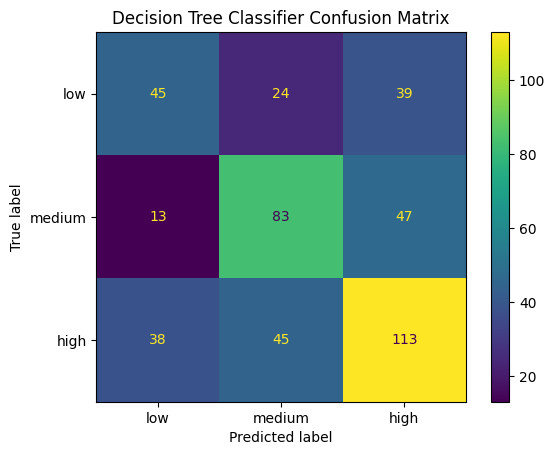

In [40]:
# CONFUSION MATRIX FOR DECISION TREE CLASSIFIER

from sklearn.metrics import plot_confusion_matrix

# fit decision tree classifier using training sub-set
classifier = DecisionTreeClassifier(max_depth=3).fit(X_train, y_train)

# confusion matrix for test sub-set
disp = plot_confusion_matrix(classifier, X_test, y_test, display_labels=class_names)
plt.title("Decision Tree Classifier Confusion Matrix")

print(disp.confusion_matrix)

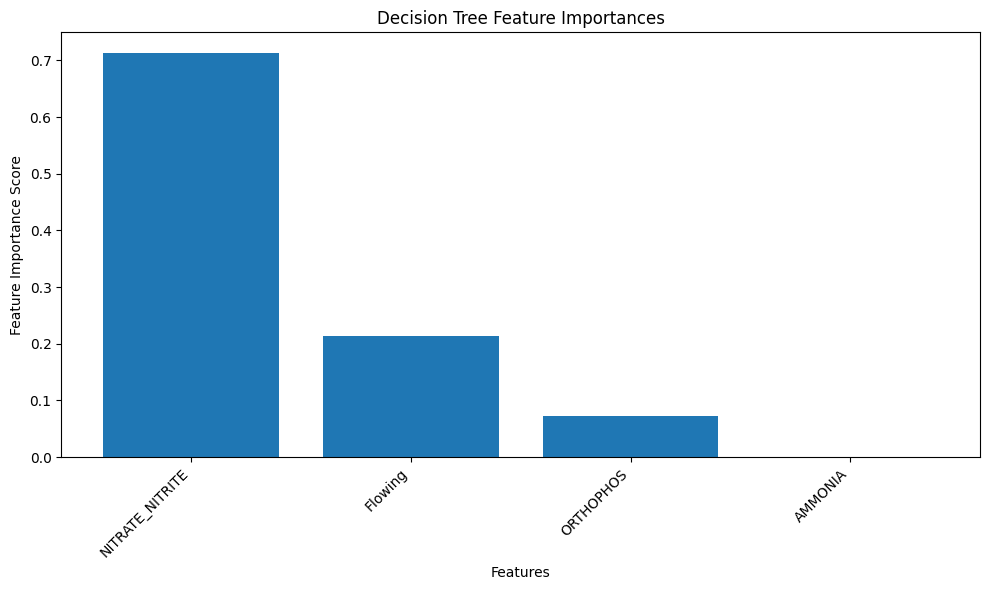

In [43]:
# DECISION TREE FEATURE IMPORTANCE (when max_depth=3)
decision_tree = DecisionTreeClassifier(max_depth=3)
decision_tree.fit(X, y)

feature_importances = decision_tree.feature_importances_

# Create a dictionary to map features to their importances
feature_importance_dict = dict(zip(X.columns, feature_importances))

# Sort the features based on importance (descending order)
sorted_features = sorted(feature_importance_dict.items(), key=lambda x: x[1], reverse=True)

# Extract the feature names and their importances
feature_names = [feat[0] for feat in sorted_features]
importance_scores = [feat[1] for feat in sorted_features]

# Plot the feature importances
plt.figure(figsize=(10, 6))
plt.bar(range(len(feature_names)), importance_scores, align='center')
plt.xticks(range(len(feature_names)), feature_names, rotation=45, ha='right')
plt.xlabel('Features')
plt.ylabel('Feature Importance Score')
plt.title('Decision Tree Feature Importances')
plt.tight_layout()
plt.show()

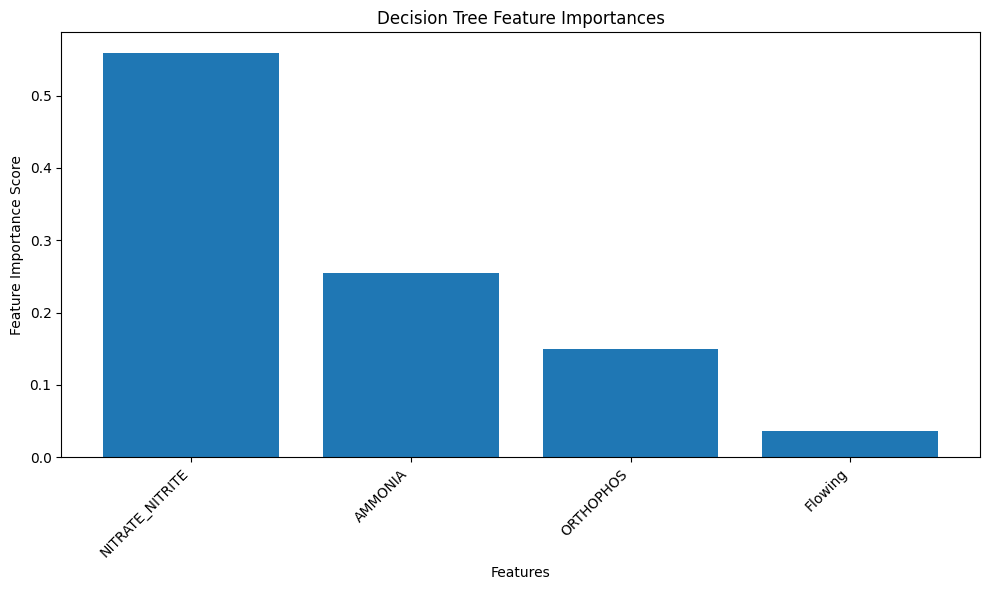

In [45]:
# DECISION TREE FEATURE IMPORTANCE (max_depth npt specified)
decision_tree = DecisionTreeClassifier()
decision_tree.fit(X, y)

feature_importances = decision_tree.feature_importances_

# Create a dictionary to map features to their importances
feature_importance_dict = dict(zip(X.columns, feature_importances))

# Sort the features based on importance (descending order)
sorted_features = sorted(feature_importance_dict.items(), key=lambda x: x[1], reverse=True)

# Extract the feature names and their importances
feature_names = [feat[0] for feat in sorted_features]
importance_scores = [feat[1] for feat in sorted_features]

# Plot the feature importances
plt.figure(figsize=(10, 6))
plt.bar(range(len(feature_names)), importance_scores, align='center')
plt.xticks(range(len(feature_names)), feature_names, rotation=45, ha='right')
plt.xlabel('Features')
plt.ylabel('Feature Importance Score')
plt.title('Decision Tree Feature Importances')
plt.tight_layout()
plt.show()

/opt/jupyterhub/pyvenv/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:696: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/opt/jupyterhub/pyvenv/lib/python3.8/site-packages/sklearn/model_selection/_validation.py", line 687, in _score
    scores = scorer(estimator, X_test, y_test)
  File "/opt/jupyterhub/pyvenv/lib/python3.8/site-packages/sklearn/metrics/_scorer.py", line 90, in __call__
    score = scorer(estimator, *args, **kwargs)
  File "/opt/jupyterhub/pyvenv/lib/python3.8/site-packages/sklearn/metrics/_scorer.py", line 397, in _passthrough_scorer
    return estimator.score(*args, **kwargs)
  File "/opt/jupyterhub/pyvenv/lib/python3.8/site-packages/sklearn/utils/metaestimators.py", line 120, in <lambda>
    out = lambda *args, **kwargs: self.fn(obj, *args, **kwargs)
  File "/opt/jupyterhub/pyvenv/lib/python3.8/site-packages/sklearn/pipeline.py", lin

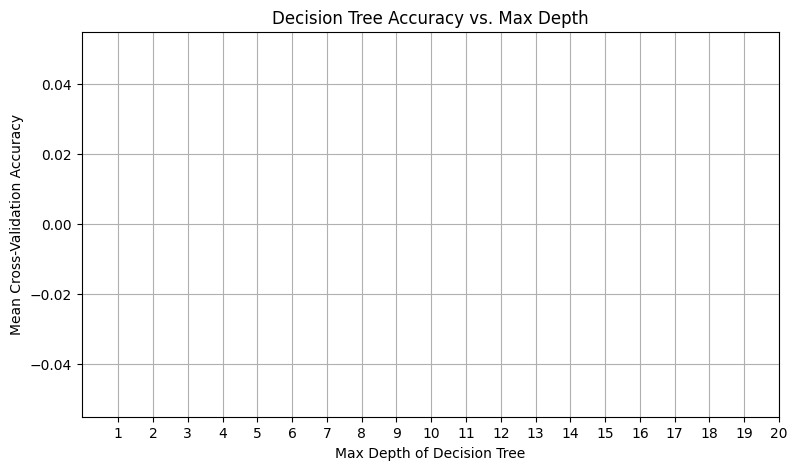